In [3]:
import mesa

from epstein_network_civil_violence.agent import Inhabitant, Police
from epstein_network_civil_violence.model import EpsteinNetworkCivilViolence
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import ListedColormap

we mainly focus on two things here: legitimacy_impact and time
legitimacy_impact is how fast would the mean field change work, you can see the mean_field_spread function in agent.py:
    self.regime_legitimacy += self.legitimacy_impact * (mean_legitimacy - self.regime_legitimacy)

And I might make some agents' legitimacy never change to create some patterns.

C:\Users\liaojw\AppData\Local\Temp\ipykernel_53800\1799811369.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


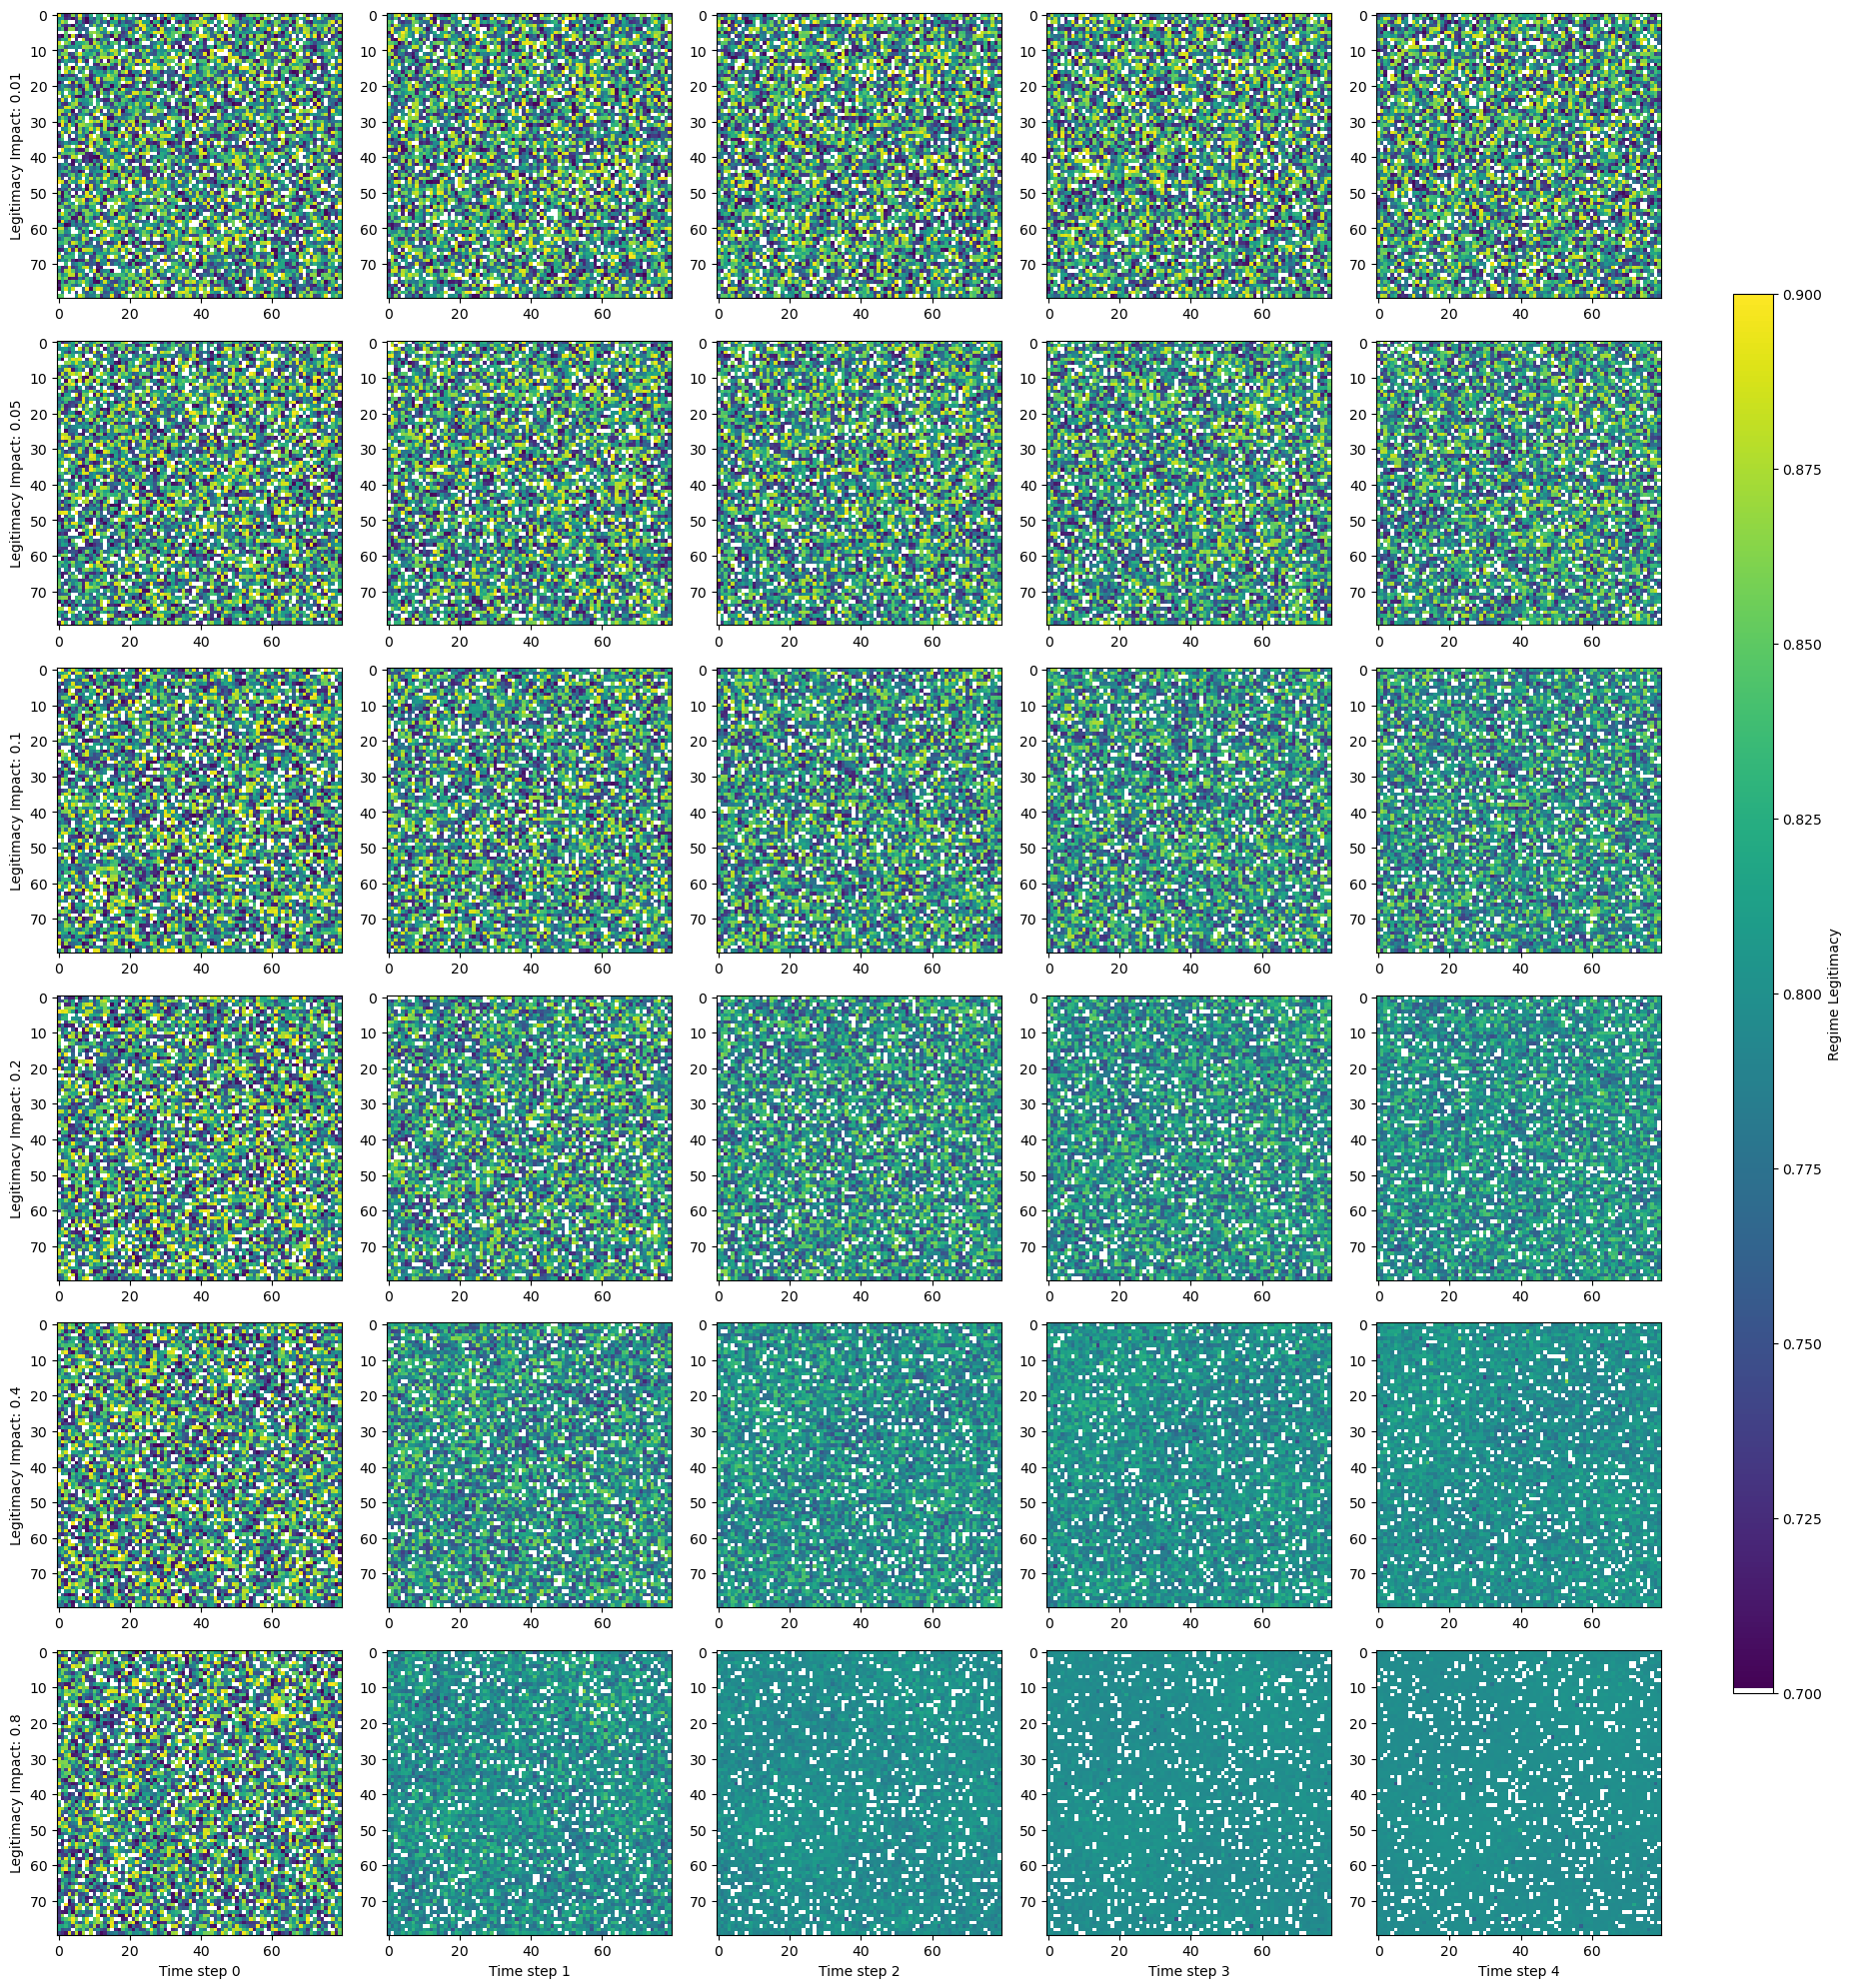

In [4]:
def create_colormap():
    # For colormap options, refer: https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/
    cmap = plt.cm.viridis
    # Make 0 into white
    colors = cmap(np.arange(cmap.N))
    colors[0, :] = np.array([1, 1, 1, 1])
    new_cmap = ListedColormap(colors)
    return new_cmap

# Define different legitimacy impacts to compare
legitimacy_impacts = [0.01, 0.05, 0.1, 0.2, 0.4, 0.8]
# Time steps to capture
time_steps = [0, 1, 2, 3, 4]
heatmaps = {impact: [] for impact in legitimacy_impacts}

# Run the model for each legitimacy impact value
for impact in legitimacy_impacts:
    model = EpsteinNetworkCivilViolence(
        width=80,
        height=80,
        citizen_density=0.9,
        cop_density=0.074,
        citizen_vision=7,
        cop_vision=7,
        legitimacy=0.8,
        max_jail_term=1000,
        active_threshold=0.1,
        arrest_prob_constant=2.3,
        movement=True,
        max_iters=300,
        alpha=0.1,
        jail_factor=1.1,
        legitimacy_impact=impact,
        legitimacy_type="heterogeneous",
        use_mean_field=True,
        legitimacy_width=0.1,
        cop_density_mode='constant',
        legitimacy_mode='constant'
    )
    
    for step in range(max(time_steps) + 1):
        model.step()
        if step in time_steps:
            agent_data = model.datacollector.get_agent_vars_dataframe()
            current_data = agent_data.xs(step, level='Step')
            inhabitant_data = current_data[current_data['breed'] == 'citizen']
            # Get x, y and regime_legitimacy
            x = inhabitant_data.x.values
            y = inhabitant_data.y.values
            legitimacy = inhabitant_data.regime_legitimacy.values
            grid_size = (80, 80)
            heatmap_data = np.zeros(grid_size)
            for i in range(len(x)):
                heatmap_data[int(x[i]), int(y[i])] = legitimacy[i]
            heatmaps[impact].append(heatmap_data)

# Plot the heatmaps
fig, axes = plt.subplots(len(legitimacy_impacts), len(time_steps), figsize=(20, 20))
cmap = create_colormap()

for i, impact in enumerate(legitimacy_impacts):
    for j, step in enumerate(time_steps):
        ax = axes[i, j]
        im = ax.imshow(heatmaps[impact][j], cmap=cmap, interpolation='nearest', vmin=0.8-0.1, vmax=0.8+0.1) # vmin=legitimacy-legitimacy_width, vmax=legitimacy+legitimacy_width
        if j == 0:
            ax.set_ylabel(f'Legitimacy Impact: {impact}')
        if i == len(legitimacy_impacts) - 1:
            ax.set_xlabel(f'Time step {step}')

# Adjust the layout to make space for the colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label='Regime Legitimacy')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


C:\Users\liaojw\AppData\Local\Temp\ipykernel_53800\4204632168.py:78: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


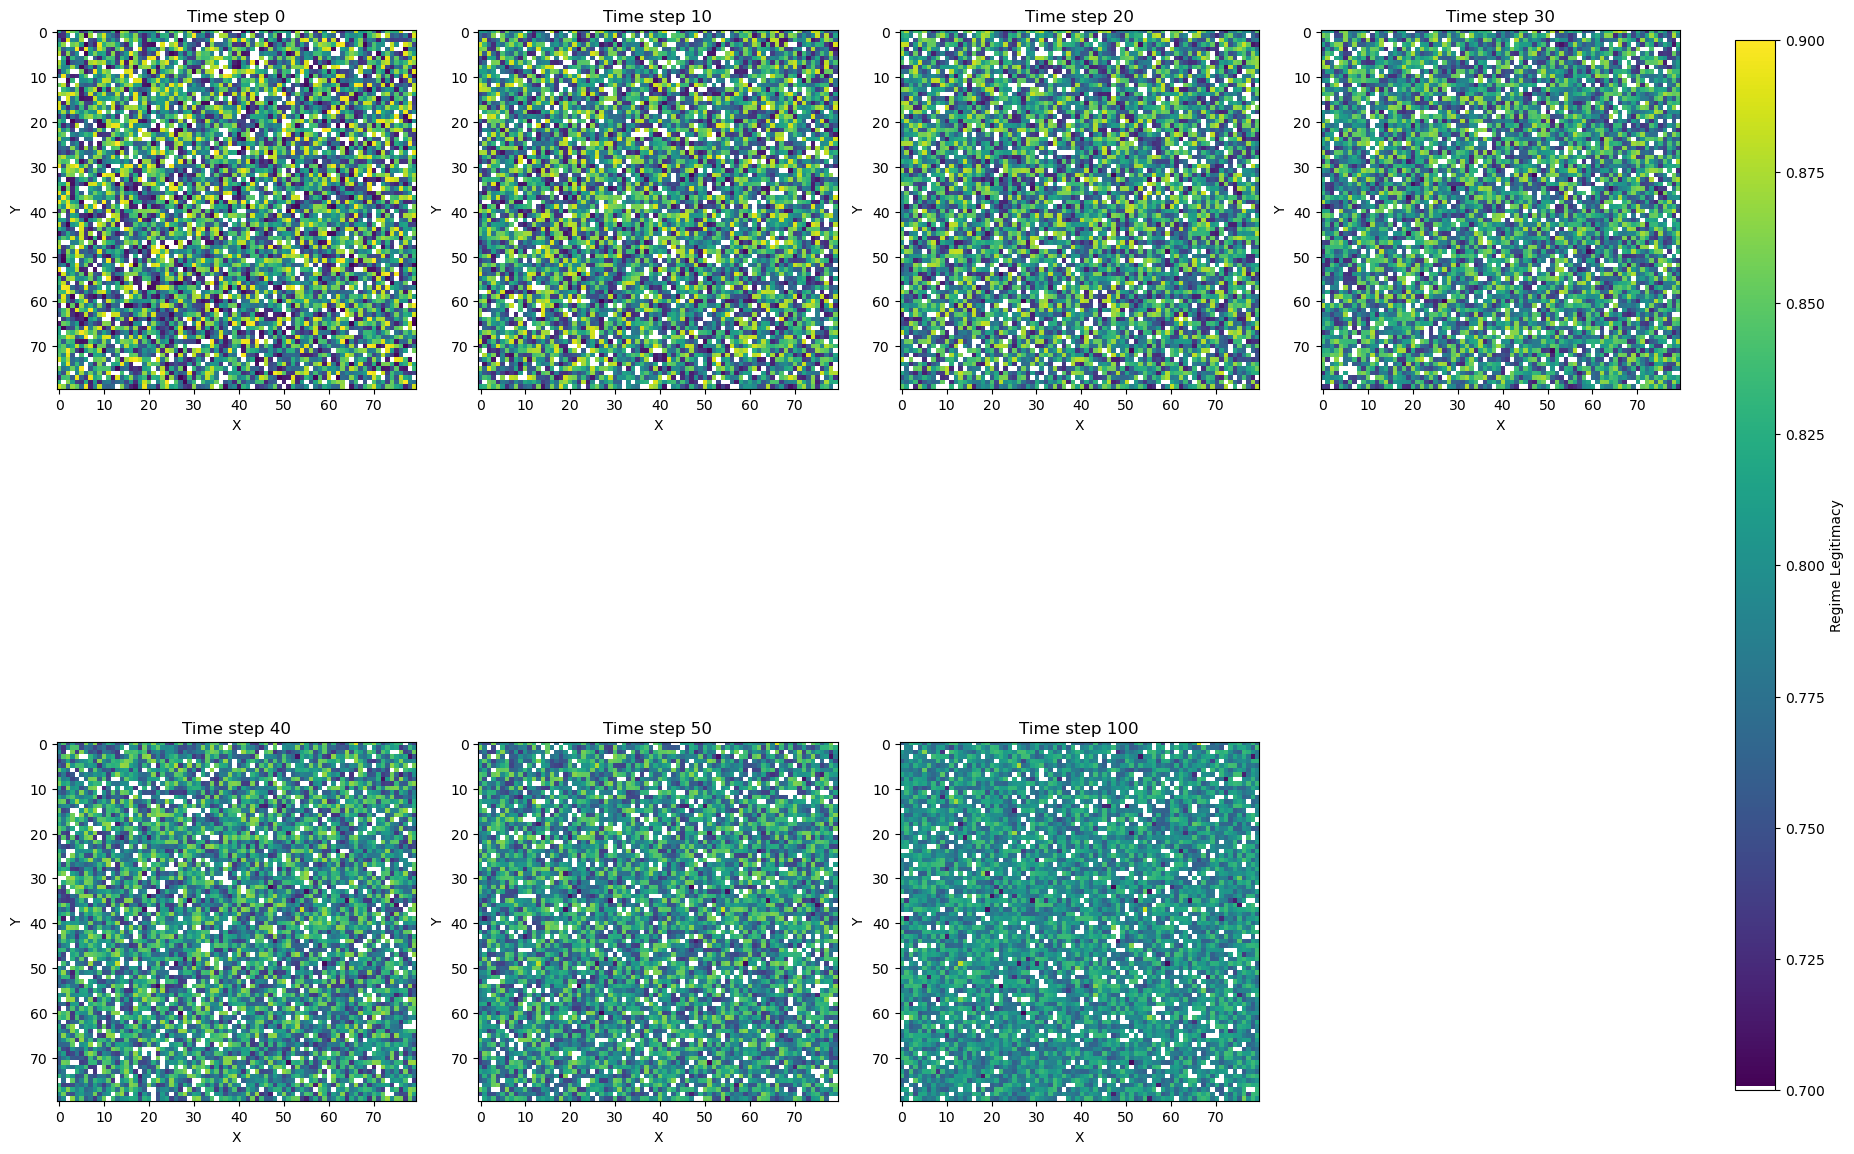

In [5]:
def create_colormap():
    # For colormap options, refer: https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/
    cmap = plt.cm.viridis
    # Make 0 into white
    colors = cmap(np.arange(cmap.N))
    colors[0, :] = np.array([1, 1, 1, 1])
    new_cmap = ListedColormap(colors)
    return new_cmap

# Create model instance with specific legitimacy impact
model = EpsteinNetworkCivilViolence(
        width=80,
        height=80,
        citizen_density=0.9,
        cop_density=0.074,
        citizen_vision=7,
        cop_vision=7,
        legitimacy=0.8,
        max_jail_term=1000,
        active_threshold=0.1,
        arrest_prob_constant=2.3,
        movement=True,
        max_iters=300,
        alpha=0.1,
        jail_factor=1.1,
        legitimacy_impact=0.01,
        legitimacy_type="heterogeneous",
        use_mean_field=True,
        legitimacy_width=0.1,
        cop_density_mode='constant',
        legitimacy_mode='constant'
)

# Define the time steps to capture
time_steps = [0, 10, 20, 30, 40, 50, 100]
heatmaps = []

# Run the model and collect data
for step in range(max(time_steps) + 1):
    model.step()
    if step in time_steps:
        agent_data = model.datacollector.get_agent_vars_dataframe()
        current_data = agent_data.xs(step, level='Step')
        inhabitant_data = current_data[current_data['breed'] == 'citizen']
        # Get x, y and regime_legitimacy
        x = inhabitant_data.x.values
        y = inhabitant_data.y.values
        legitimacy = inhabitant_data.regime_legitimacy.values
        grid_size = (80, 80)
        heatmap_data = np.zeros(grid_size)
        for i in range(len(x)):
            heatmap_data[int(x[i]), int(y[i])] = legitimacy[i]
        heatmaps.append(heatmap_data)

# Determine the number of rows and columns for subplots
num_cols = 4
num_rows = (len(time_steps) + num_cols - 1) // num_cols

# Plot the heatmaps
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()
cmap = create_colormap()

for i, ax in enumerate(axes):
    if i < len(time_steps):
        im = ax.imshow(heatmaps[i], cmap=cmap, interpolation='nearest', vmin=0.8-0.1, vmax=0.8+0.1)  # vmin=legitimacy-legitimacy_width, vmax=legitimacy+legitimacy_width
        ax.set_title(f'Time step {time_steps[i]}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
    else:
        fig.delaxes(ax)  # Remove empty subplot

# Adjust the layout to make space for the colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label='Regime Legitimacy')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


C:\Users\liaojw\AppData\Local\Temp\ipykernel_53800\813127048.py:85: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


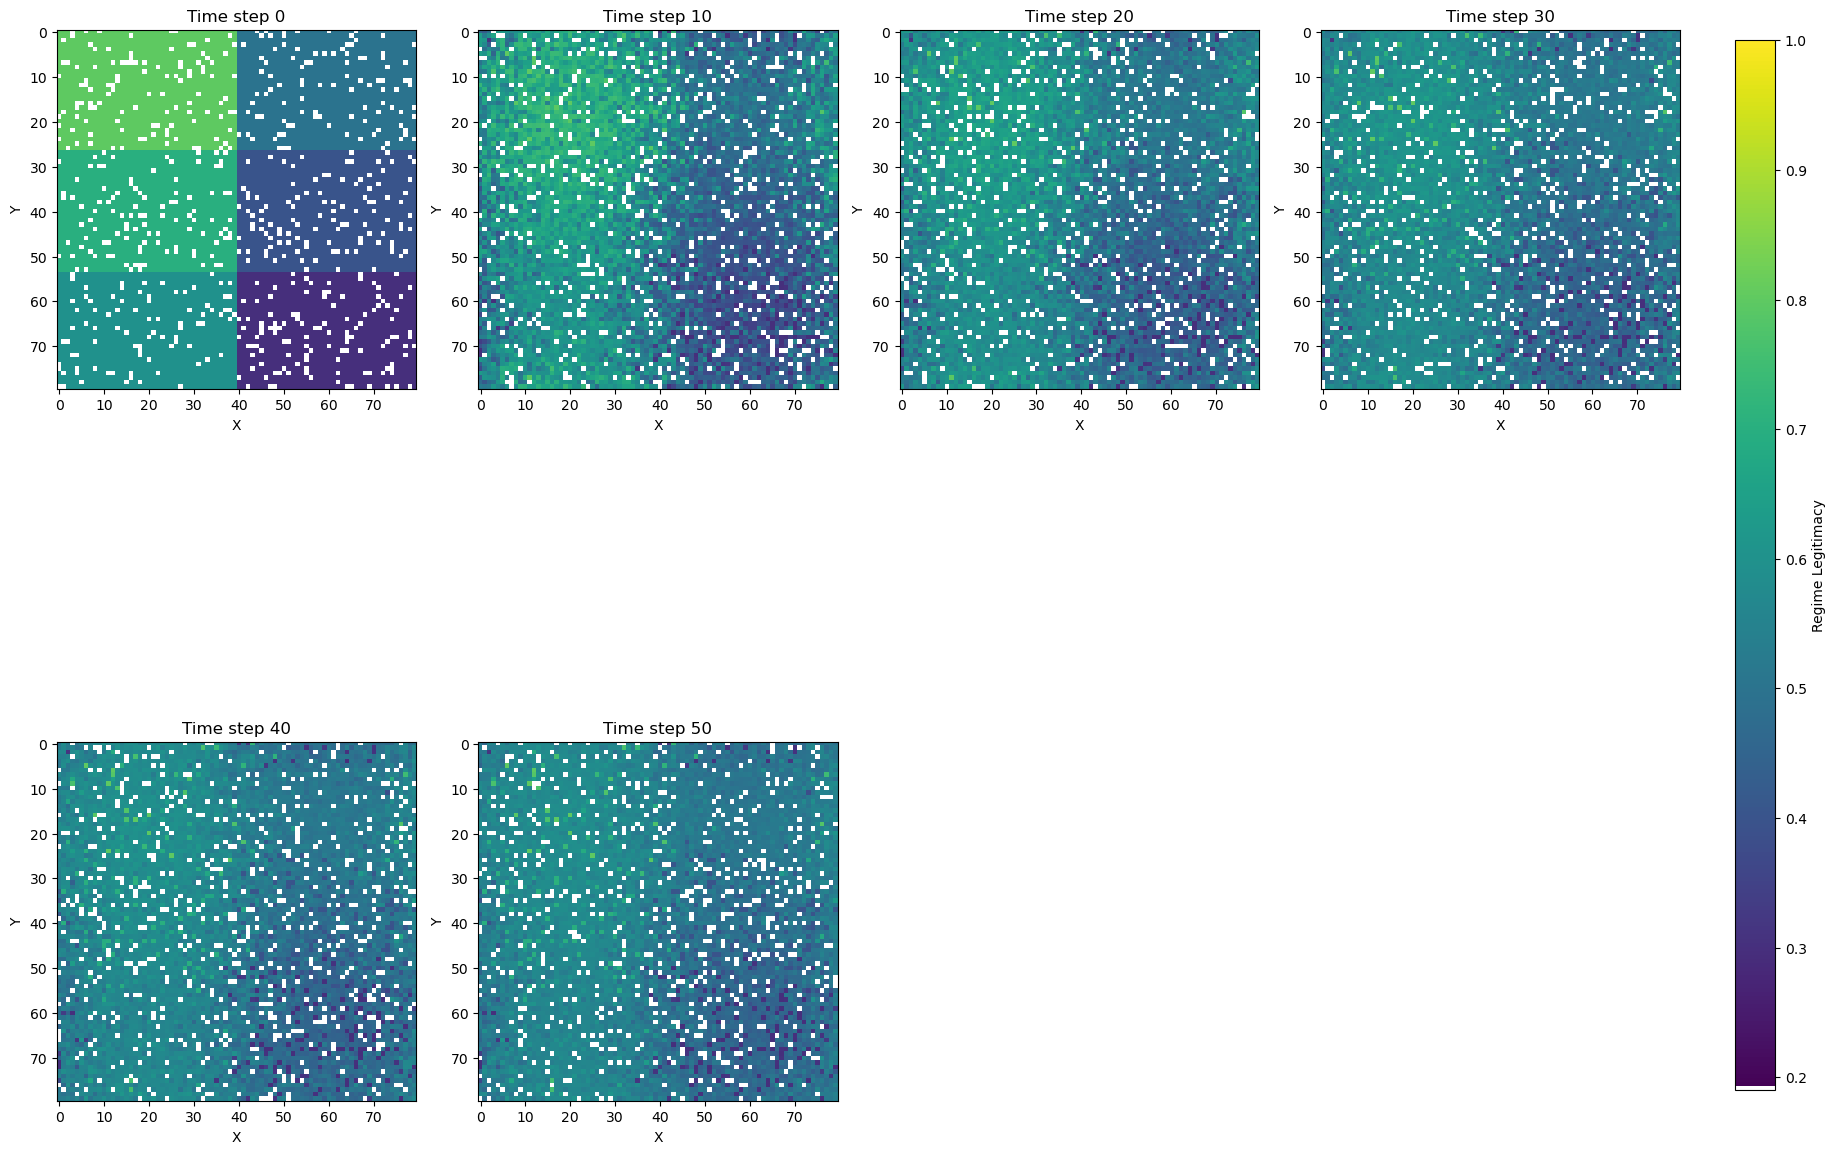

In [6]:
def create_colormap():
    # For colormap options, refer: https://www.analyticsvidhya.com/blog/2020/09/colormaps-matplotlib/
    cmap = plt.cm.viridis
    # Make 0 into white
    colors = cmap(np.arange(cmap.N))
    colors[0, :] = np.array([1, 1, 1, 1])
    new_cmap = ListedColormap(colors)
    return new_cmap

legitimacy_matrix = np.array([
    [0.8, 0.7, 0.6],
    [0.5, 0.4, 0.3]
])

# Create model instance with specific legitimacy impact
model = EpsteinNetworkCivilViolence(
    width=80,
    height=80,
    citizen_density=0.9,
    cop_density=0.074,
    citizen_vision=7,
    cop_vision=7,
    legitimacy=0.8,
    max_jail_term=1000,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=300,
    alpha=0.1,
    jail_factor=1.1,
    legitimacy_impact=0.2,
    legitimacy_type="by_regions",
    legitimacy_matrix=legitimacy_matrix,
    use_mean_field=True,
    legitimacy_width=0.1,
    cop_density_mode='constant',
    legitimacy_mode='constant'
)

# Define the time steps to capture
time_steps = [0, 10, 20, 30, 40, 50]
heatmaps = []

# Run the model and collect data
for step in range(max(time_steps) + 1):
    model.step()
    if step in time_steps:
        agent_data = model.datacollector.get_agent_vars_dataframe()
        current_data = agent_data.xs(step, level='Step')
        inhabitant_data = current_data[current_data['breed'] == 'citizen']
        # Get x, y and regime_legitimacy
        x = inhabitant_data.x.values
        y = inhabitant_data.y.values
        legitimacy = inhabitant_data.regime_legitimacy.values
        grid_size = (80, 80)
        heatmap_data = np.zeros(grid_size)
        for i in range(len(x)):
            heatmap_data[int(x[i]), int(y[i])] = legitimacy[i]
        heatmaps.append(heatmap_data)

# Determine the number of rows and columns for subplots
num_cols = 4
num_rows = (len(time_steps) + num_cols - 1) // num_cols

# Plot the heatmaps
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
axes = axes.flatten()
cmap = create_colormap()

for i, ax in enumerate(axes):
    if i < len(time_steps):
        # im = ax.imshow(heatmaps[i], cmap=cmap, interpolation='nearest', vmin=0.8-0.1, vmax=0.8+0.1)  # vmin=legitimacy-legitimacy_width, vmax=legitimacy+legitimacy_width
        im = ax.imshow(heatmaps[i], cmap=cmap, interpolation='nearest', vmin=0.19, vmax=1)  # using legitimacy by_regions
        ax.set_title(f'Time step {time_steps[i]}')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
    else:
        fig.delaxes(ax)  # Remove empty subplot

# Adjust the layout to make space for the colorbar
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.87, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
fig.colorbar(im, cax=cbar_ax, label='Regime Legitimacy')

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()
